In [283]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import norm
%matplotlib inline
style.use('ggplot')

In [37]:
df = pd.read_csv('companies.csv')
df = df['symbol'].unique()
tickers = df.tolist()

In [91]:
df_stocks = pd.read_csv('sp500_joined_closes.csv')
df_stocks = df_stocks.fillna(df_stocks.mean())

In [95]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])

In [96]:
df_stocks.set_index("Date", inplace=True)

In [98]:
df_stocks.interpolate(method='linear', inplace=True)

In [630]:
df_stocks = df_stocks.iloc[::-1]

In [631]:
ticks = ['BAC', 'GS', 'JPM', 'MS']

In [632]:
stocks = df_stocks[['BAC', 'GS', 'JPM', 'MS']]

In [647]:
#Set the number of iterations to 10000 and define an array to hold the simulation results; initially set to all zeros
stock_return = stocks.pct_change()
mean_returns = stock_return.mean()
cov_matrix = stock_return.cov()
num_iterations = 10000
simulation_res = np.zeros((4+len(ticks)-1,num_iterations))

for i in range(num_iterations):
    weights = np.array(np.random.random(4))
    weights /= np.sum(weights)
    
#calculate the return and std for every step
portfolio_return = np.sum(mean_returns * weights)
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

simulation_res[0,i] = portfolio_return
simulation_res[1,i] = portfolio_std_dev

#calculate Sharpe Ratio and store it in the array
simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]

for j in range(len(weights)):
    simulation_res[j+3, i] = weights[j]
    
sim_frame = pd.DataFrame(simulation_res.T, columns=['ret', 'stdev', 'sharpe',ticks[0], ticks[1], ticks[2], ticks[3]])
max_sharpe = sim_frame.iloc[sim_frame['sharpe'].idxmax()]
min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]

print("The portfolio for Sharpe Ratio:\n", max_sharpe)
print("The portfolio for min risk:\n", min_std)

The portfolio for Sharpe Ratio:
 ret       0.000284
stdev     0.024944
sharpe    0.011390
BAC       0.244230
GS        0.313367
JPM       0.014849
MS        0.427554
Name: 9999, dtype: float64
The portfolio for min risk:
 ret       0.0
stdev     0.0
sharpe    0.0
BAC       0.0
GS        0.0
JPM       0.0
MS        0.0
Name: 0, dtype: float64


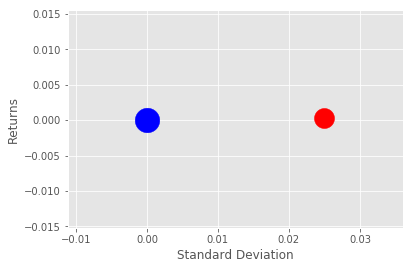

In [648]:
plt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.scatter(max_sharpe[1], max_sharpe[0], color='r', s=400)
plt.scatter(min_std[1], min_std[0], color='b', s=600)
plt.show()

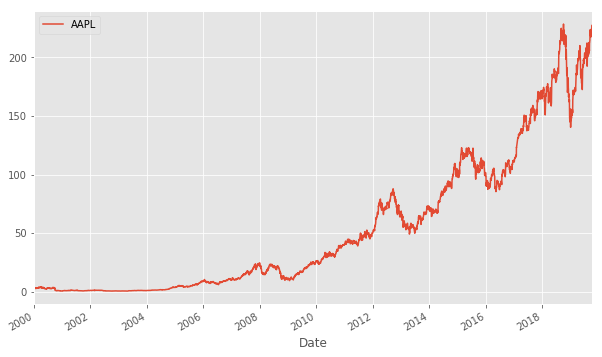

In [455]:
log_returns = np.log(1 + stock.pct_change())
stocks.plot(figsize=(10, 6));

In [456]:
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

In [457]:
x = np.random.rand(10, 2)
Z = norm.ppf(np.random.rand(10,2))
t_intervals = 1000
iterations = 10
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [458]:
#stock price of today
S0 = stocks.iloc[-1]

In [459]:
price_list = np.zeros_like(daily_returns)

In [460]:
price_list[0] = S0

In [461]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

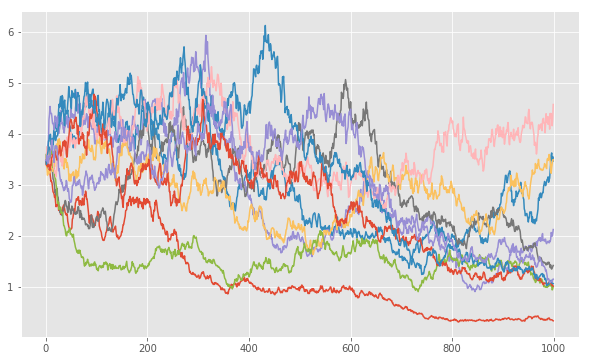

In [462]:
plt.figure(figsize=(10,6))
plt.plot(price_list)
plt.show()